In [1]:
import pickle
from models_otimizador import *
import pandas as pd
import json

import logging

# Configurar o logging para mostrar mensagens INFO
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.StreamHandler()  # Para mostrar no output do notebook
    ]
)

# Ou de forma mais simples:
logging.getLogger().setLevel(logging.INFO)


%load_ext autoreload
%reload_ext autoreload

%autoreload 2

In [31]:

# # Carregar o arquivo pickle
# with open('parametros_modelo.pkl', 'rb') as f:
#     params_modelo = pickle.load(f)

arquivo_excel = 'entradas.xlsx'
arquivo_json = 'entradas.json'
nome = 'Cen1'

options = {
    "NO_BOG": True,
    "BOT_CTE": False,
    "BOG_VAR": False,
    "TIMELIMIT": 100
}

opt = otimizador(nome, arquivo_json, arquivo_excel, options)

opt.solve_model()

if opt.model.sol_status == 1:
    status = "Solução ótima encontrada"

elif opt.model.sol_status == 2:
    status = "Solução encontrada"

else:
    if opt.model.sol_status == 0:
        status = "ERRO! Nenhuma solução encontrada"

    elif opt.model.sol_status == -1:
        status = "ERRO! Problema sem solução"

    elif opt.model.sol_status == -2:
        status = "ERRO! Infinitas soluções possíveis"
print(status)

Solução ótima encontrada


In [28]:
opt.entradas

{'T': range(0, 115),
 'I': range(0, 4),
 'J': range(0, 2),
 'M': range(0, 3),
 'C': range(0, 3),
 'N': range(0, 7),
 'TP': [0],
 'CF': [],
 'K': 14796800.000000002,
 'H': 1e-06,
 'S0': 69452.21,
 'SW': 0.1,
 'S_MAX': 165285.0,
 'S_FLEX': 5000.0,
 'S_MIN_IDLE': 10000.0,
 'S_MIN_PROD': 20000.0,
 'BP': 100.0,
 'BG': 100.0,
 'Q1': 30000.0,
 'Q2': 150000.0,
 'PDEM': 5918720.0,
 'PSPEQ': 217600000.00000003,
 'PLOCK': 108800000000.00002,
 'SMIN_FLEX': 1.0,
 'BOGCTE': 1.0,
 'DOLAR': 5.44,
 'VH': [24273, 48646.6, 72919.6, 97293.2, 121566.2, 145939.8, 170212.8],
 'VL': [0, 24273, 48646.6, 72919.6, 97293.2, 121566.2, 145939.8],
 'BI': [29.1276,
  58.37592,
  87.50352,
  116.75184,
  145.87944,
  175.12776,
  204.25536],
 'INT': {0: array([[ 7, 14],
         [24, 31],
         [39, 46],
         [54, 61],
         [85, 92]])},
 'VT': {0: 2954294.370023732},
 'CC_INI': {0: 0},
 'CA_INI': {0: 0},
 'TPH': {(0, 0): 1865932.324106989,
  (0, 1): 2487811.2889969847,
  (0, 2): 2954294.370023732},
 'TPL': 

In [22]:
opt.model.toJson('modelo_otimizado.json')

In [14]:
opt.model.variablesDict()

{'y_0_0': y_0_0,
 'y_1_0': y_1_0,
 's_0': s_0,
 'x_0': x_0,
 's_min_0': s_min_0,
 'y_0_1': y_0_1,
 'y_1_1': y_1_1,
 's_1': s_1,
 'x_1': x_1,
 's_min_1': s_min_1,
 'y_0_2': y_0_2,
 'y_1_2': y_1_2,
 's_2': s_2,
 'x_2': x_2,
 's_min_2': s_min_2,
 'y_0_3': y_0_3,
 'y_1_3': y_1_3,
 's_3': s_3,
 'x_3': x_3,
 's_min_3': s_min_3,
 'y_0_4': y_0_4,
 'y_1_4': y_1_4,
 's_4': s_4,
 'x_4': x_4,
 's_min_4': s_min_4,
 'y_0_5': y_0_5,
 'y_1_5': y_1_5,
 's_5': s_5,
 'x_5': x_5,
 's_min_5': s_min_5,
 'y_0_6': y_0_6,
 'y_1_6': y_1_6,
 's_6': s_6,
 'x_6': x_6,
 's_min_6': s_min_6,
 'y_0_7': y_0_7,
 'y_1_7': y_1_7,
 's_7': s_7,
 'x_7': x_7,
 'lgc_0_1_7': lgc_0_1_7,
 'lgc_0_2_7': lgc_0_2_7,
 'topc_0_0_7': topc_0_0_7,
 'topc_0_1_7': topc_0_1_7,
 'topc_0_2_7': topc_0_2_7,
 's_min_7': s_min_7,
 'y_0_8': y_0_8,
 'y_1_8': y_1_8,
 's_8': s_8,
 'x_8': x_8,
 'lgc_0_1_8': lgc_0_1_8,
 'lgc_0_2_8': lgc_0_2_8,
 'topc_0_0_8': topc_0_0_8,
 'topc_0_1_8': topc_0_1_8,
 'topc_0_2_8': topc_0_2_8,
 's_min_8': s_min_8,
 'y_0_9':

In [12]:
model.variablesDict()['lgc_0_0_64'].value()


0.0

In [34]:
opt.extrair_resultados()

2025-11-10 17:09:46,172 - INFO - ExtraÃ§Ã£o finalizada. 


In [18]:
opt.entradas

{'T': range(0, 115),
 'I': range(0, 4),
 'J': range(0, 2),
 'M': range(0, 3),
 'C': range(0, 3),
 'N': range(0, 7),
 'TP': [0],
 'CF': [],
 'K': 14796800.000000002,
 'H': 1e-06,
 'S0': 69452.21,
 'SW': 0.1,
 'S_MAX': 165285.0,
 'S_FLEX': 5000.0,
 'S_MIN_IDLE': 10000.0,
 'S_MIN_PROD': 20000.0,
 'BP': 100.0,
 'BG': 100.0,
 'Q1': 30000.0,
 'Q2': 150000.0,
 'PDEM': 5918720.0,
 'PSPEQ': 217600000.00000003,
 'PLOCK': 108800000000.00002,
 'SMIN_FLEX': 1.0,
 'BOGCTE': 1.0,
 'DOLAR': 5.44,
 'VH': [24273, 48646.6, 72919.6, 97293.2, 121566.2, 145939.8, 170212.8],
 'VL': [0, 24273, 48646.6, 72919.6, 97293.2, 121566.2, 145939.8],
 'BI': [29.1276,
  58.37592,
  87.50352,
  116.75184,
  145.87944,
  175.12776,
  204.25536],
 'INT': {0: array([[ 7, 14],
         [24, 31],
         [39, 46],
         [54, 61],
         [85, 92]])},
 'VT': {0: 2954294.370023732},
 'CC_INI': {0: 0},
 'CA_INI': {0: 0},
 'TPH': {(0, 0): 1865932.324106989,
  (0, 1): 2487811.2889969847,
  (0, 2): 2954294.370023732},
 'TPL': 

In [21]:
opt.resultado_modelo

{'status': 1,
 'objective_value': 0,
 'd': [],
 'rv': [],
 'x': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  63597.79,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'y': [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
 

In [48]:
# gerar uma lista que seja resultado da multiplicação de W por y
resultado = [W[i] * opt.resultado_modelo["y"][0][i] for i in range(len(W))]

# Plot de resultados


In [26]:
opt.params_modelo

{'NR_QUANTIDADE_DE_DIAS': 115,
 'NR_QUANTIDADE_DE_CONTRATOS': 2,
 'NR_QUANTIDADE_DE_DEMANDAS': 4,
 'NR_DICT_VOLUME_TOTAL_CONTRATO': {0: 2954294.370023732},
 'NR_LIST_CONJ_CONTRATOS_TOP': [0],
 'NR_LIST_CONJ_CONTRATOS_FF': [],
 'NR_MAX_CATEGORIAS_TOP': 3,
 'NR_MAX_CATEGORIAS_LNGCOST': 3,
 'NR_DICT_VOLUME_MINIMO_FF': {},
 'NR_DICT_VOLUME_MAXIMO_FF': {},
 'NR_DICT_PESO_DEMANDA_CONTRATO': {(0, 0): 0,
  (0, 1): 0,
  (0, 2): 0,
  (0, 3): 0,
  (1, 0): 10,
  (1, 1): 10,
  (1, 2): 10,
  (1, 3): 10},
 'NR_DICT_QTDD_INFERIOR_CATEG_TOP': {(0, 0): 0.0,
  (0, 1): 1865932.324106989,
  (0, 2): 2487811.2889969847},
 'NR_DICT_QTDD_SUPERIOR_CATEG_TOP': {(0, 0): 1865932.324106989,
  (0, 1): 2487811.2889969847,
  (0, 2): 2954294.370023732},
 'NR_DICT_QTDD_INFERIOR_CATEG_LNGCOST': {(0, 0): 0.0,
  (0, 1): 1865932.324106989,
  (0, 2): 2487811.2889969847},
 'NR_DICT_QTDD_SUPERIOR_CATEG_LNGCOST': {(0, 0): 1865932.324106989,
  (0, 1): 2487811.2889969847,
  (0, 2): 2954294.370023732},
 'NR_DICT_QTDD_CONFIRMADA_IN

In [46]:
compras_ltc

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [47]:
opt.resultado_modelo

{'status': 1,
 'objective_value': 0,
 'd': [],
 'rv': [],
 'x': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'y': [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0

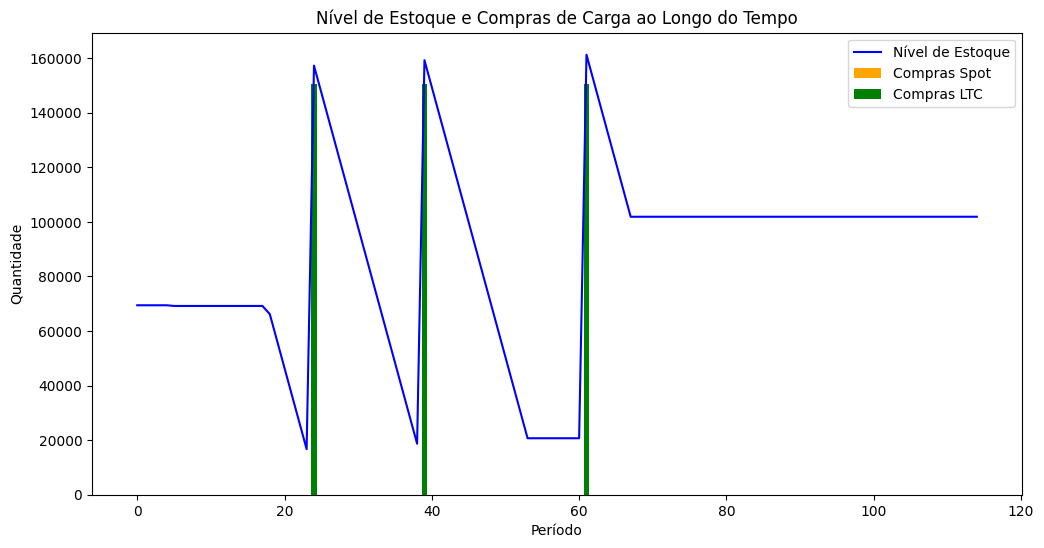

In [49]:
# Plotando resultados obtidos em que:
# opt.number_index = periodos de tempo
# variáveis presentes no opt.resultado_modelo:
# x = quantidade de carga comprada de contrato spot
# y_j = indicador de compra de carga em contrato LTC 
# s = nível de estoque de GNL no terminal
# Plotar gráfico de nível de estoque ao longo do tempo indicando em barras as compras de cargas spot e LTC



T = opt.number_index
I = range(opt.params_modelo["NR_QUANTIDADE_DE_DEMANDAS"])
J = range(opt.params_modelo["NR_QUANTIDADE_DE_CONTRATOS"])
N = range(7)
M = range(opt.params_modelo["NR_MAX_CATEGORIAS_TOP"])
C = range(opt.params_modelo["NR_MAX_CATEGORIAS_LNGCOST"])
TP = opt.params_modelo["NR_LIST_CONJ_CONTRATOS_TOP"]
CF = opt.params_modelo["NR_LIST_CONJ_CONTRATOS_FF"]
J1 = range(opt.params_modelo["NR_QUANTIDADE_DE_CONTRATOS"] - 1)
        
W = [opt.params_modelo['NR_DICT_CARGAS_PROGRAMADAS_TOP'][(0,i)] for i in range(115)]    
compras_ltc = [W[i] * opt.resultado_modelo["y"][0][i] for i in range(len(W))]    
        
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(opt.number_index, opt.resultado_modelo["s"], label="Nível de Estoque", color="blue")
ax.bar(opt.number_index, opt.resultado_modelo["x"], label="Compras Spot", color="orange")

ax.bar(opt.number_index,compras_ltc, label=f"Compras LTC", color="green")
ax.set_xlabel("Período")
ax.set_ylabel("Quantidade")
ax.set_title("Nível de Estoque e Compras de Carga ao Longo do Tempo")
ax.legend()
plt.show()